In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Df.csv to Df.csv


**Importing dataset containing audio files**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
d= pd.read_csv('Df.csv')

d

,Sound,Label
0,1.wav,Namaskar
1,2.wav,Namaskar
2,3.wav,Namaskar
3,4.wav,Namaskar
4,5.wav,Namaskar
...,...,...
206,119.wav,samachar
207,120.wav,samachar
208,121.wav,samachar
209,122.wav,samachar


In [6]:
audio='/content/gdrive/MyDrive/files'

In [7]:
import librosa
audio_file_path='/content/gdrive/MyDrive/files/1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

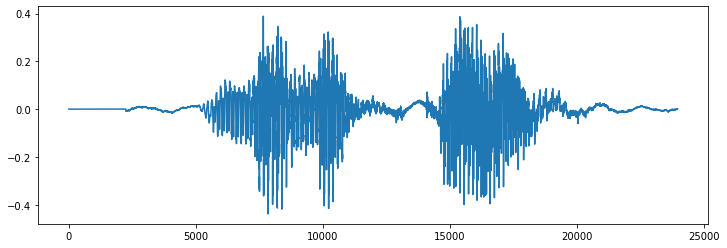

In [8]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [74]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=16000,n_mfcc=40)
print(mfccs.shape)

(40, 47)


In [75]:
mfccs

array([[-6.3733392e+02, -6.3733392e+02, -6.3733392e+02, ...,
        -5.0931870e+02, -5.2096875e+02, -5.2436786e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.1453654e+02,  9.4865479e+01,  8.7488068e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.2283867e+01,  1.0358049e+01,  4.1531157e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.0150423e+00, -1.4642328e+00, -9.4745451e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.0184813e+00,  3.0144219e+00,  1.9011706e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.7469411e+00,  4.4189682e+00, -3.1895787e-02]], dtype=float32)

In [76]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=16000,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [77]:
import os
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(d.iterrows()):
    file_name = os.path.join(os.path.abspath(audio),str(row["Sound"]))
    final_class_labels=row["Label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

211it [00:04, 44.50it/s]


In [110]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','Label'])
extracted_features_df.head()

,feature,Label
0,"[-384.18805, 189.30464, -19.617859, -0.0232861...",Namaskar
1,"[-368.5589, 196.48805, -30.281378, 0.92036843,...",Namaskar
2,"[-406.32217, 186.55807, -24.159048, 0.18557848...",Namaskar
3,"[-435.14105, 166.14139, -18.402683, -5.0251703...",Namaskar
4,"[-326.56314, 196.70654, -19.21339, -3.6072223,...",Namaskar


In [111]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['Label'].tolist())

In [113]:
X.shape

(211, 40)

In [114]:
y.shape

(211,)

In [115]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [116]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [117]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [118]:
X_train.shape

(168, 40)

In [119]:
X_test.shape

(43, 40)

In [120]:
y_train.shape

(168, 7)

In [121]:
y_test.shape

(43, 7)

**MODEL CREATION**

In [122]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [124]:
### No of classes
num_labels=y.shape[1]

In [126]:
num_labels

7

In [125]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [127]:
##second Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [128]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [129]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                

In [130]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [131]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 2

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
84/84 [==============================] - 1s 4ms/step - loss: 76.3127 - accuracy: 0.2262 - val_loss: 23.8133 - val_accuracy: 0.2093
Epoch 2/500
84/84 [==============================] - 0s 2ms/step - loss: 49.5794 - accuracy: 0.1488 - val_loss: 7.9003 - val_accuracy: 0.3953
Epoch 3/500
84/84 [==============================] - 0s 2ms/step - loss: 32.6633 - accuracy: 0.2083 - val_loss: 4.4728 - val_accuracy: 0.3488
Epoch 4/500
84/84 [==============================] - 0s 3ms/step - loss: 20.8897 - accuracy: 0.1964 - val_loss: 2.0251 - val_accuracy: 0.4651
Epoch 5/500
84/84 [==============================] - 0s 2ms/step - loss: 14.8489 - accuracy: 0.1964 - val_loss: 2.0465 - val_accuracy: 0.2093
Epoch 6/500
84/84 [==============================] - 0s 2ms/step - loss: 10.1595 - accuracy: 0.2500 - val_loss: 1.7869 - val_accuracy: 0.2326
Epoch 7/500
84/84 [==============================] - 0s 2ms/step - loss: 7.0881 - accuracy: 0.2857 - val_loss: 1.6236 - val_accuracy: 0.1860
Epoch 

In [132]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9767441749572754


In [141]:
file_name='/content/gdrive/MyDrive/files/1.wav'

In [142]:
prediction_feature=features_extractor(file_name)

In [143]:
prediction_feature

array([-3.8418805e+02,  1.8930464e+02, -1.9617859e+01, -2.3286169e-02,
        3.8938320e+01, -5.8916202e+00, -1.5703475e+00,  1.7681757e+01,
       -1.0353161e+01, -9.0085535e+00,  1.1978271e+01, -1.4789484e+00,
       -2.1036417e+00,  1.3111411e+01,  1.7754769e-01, -6.8009219e+00,
        6.3118219e+00,  1.5876224e+00, -4.2772884e+00,  5.8073626e+00,
        3.8567293e+00, -3.3417630e+00,  1.2790797e+00,  7.0279866e-01,
       -2.5712030e+00,  2.6175907e+00,  2.1231036e+00, -2.6229057e+00,
       -3.4691763e-01,  1.2436819e-01, -6.0142231e-01,  3.5598943e+00,
        2.0723412e+00, -2.4341598e+00,  1.0926208e+00,  2.6510084e+00,
       -1.5689056e+00, -1.1212561e-01,  3.5548546e+00,  1.9980277e+00],
      dtype=float32)

In [144]:
prediction_feature1=prediction_feature.reshape(1,-1)

In [145]:
prediction_feature1.shape

(1, 40)

In [146]:
p=np.argmax(model.predict(prediction_feature1), axis= 1)

In [147]:
p

array([2])

In [148]:
q = labelencoder.inverse_transform(p) 
q

array(['Namaskar'], dtype='<U8')